## Objective

We have a training set and a test set of images of 3 classes. Each image has a filename that is its unique id. The dataset comprises 3 classes: COVID-19, Viral Pneumonia, and Normal. The goal of the project is to create a classifier capable of determining the class of the X-ray image.

## Step 1 

Loading libararies and datasets

In [1]:
# import libraries
import numpy as np
import pandas as pd
import cv2
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
sns.set()
filterwarnings('ignore')

In [2]:
# loading the training data set
trainImages=np.load('covid-19-dataset//trainimage.npy')
trainLabels=pd.read_csv('covid-19-dataset//trainLabels.csv')

In [3]:
# loading the test data set
testImages=np.load('covid-19-dataset//testimage.npy')
testLabels=pd.read_csv('covid-19-dataset//testLabels.csv')

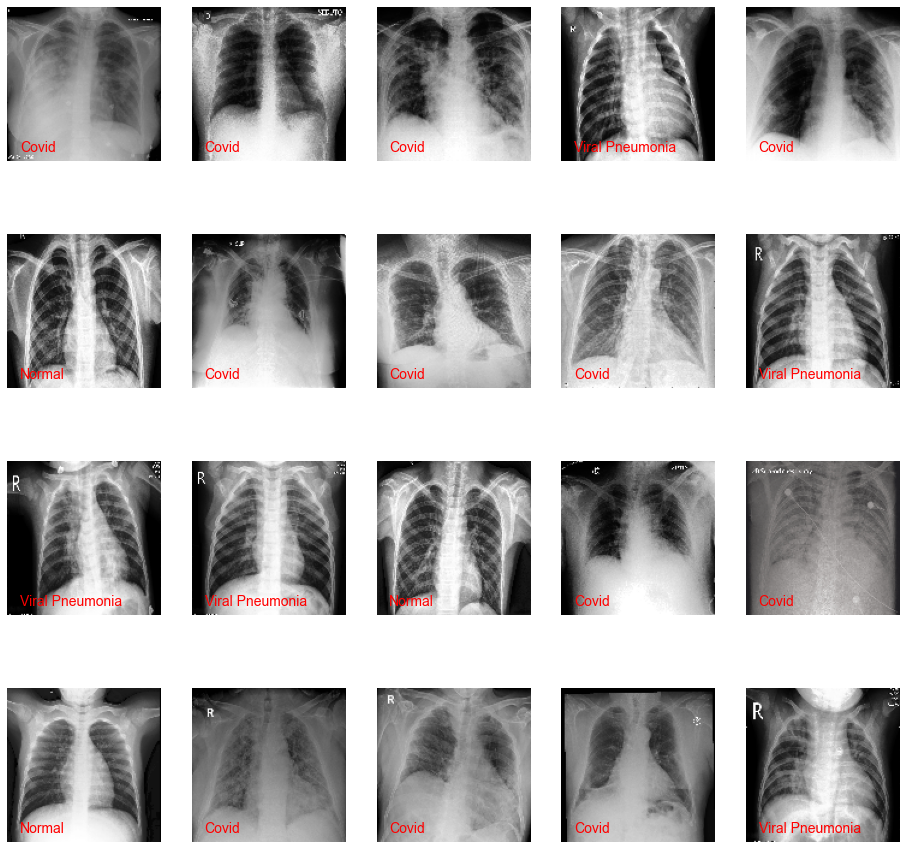

In [4]:
# visualizing 20 random samples from the training set with their labels
sample=np.random.choice(np.arange(trainImages.shape[0]), size=20)
rows=4
cols=5
fig, ax=plt.subplots(rows,cols,figsize=(16,rows*4))
for i in range(rows*cols):
    ax[i//cols, i%cols].imshow(trainImages[sample[i]])
    ax[i//cols, i%cols].text(x=10, y=120, s=trainLabels['Label'][sample[i]], fontsize=14, c='red')
    ax[i//cols, i%cols].axis('off')
    ax[i//cols, i%cols].grid('off')

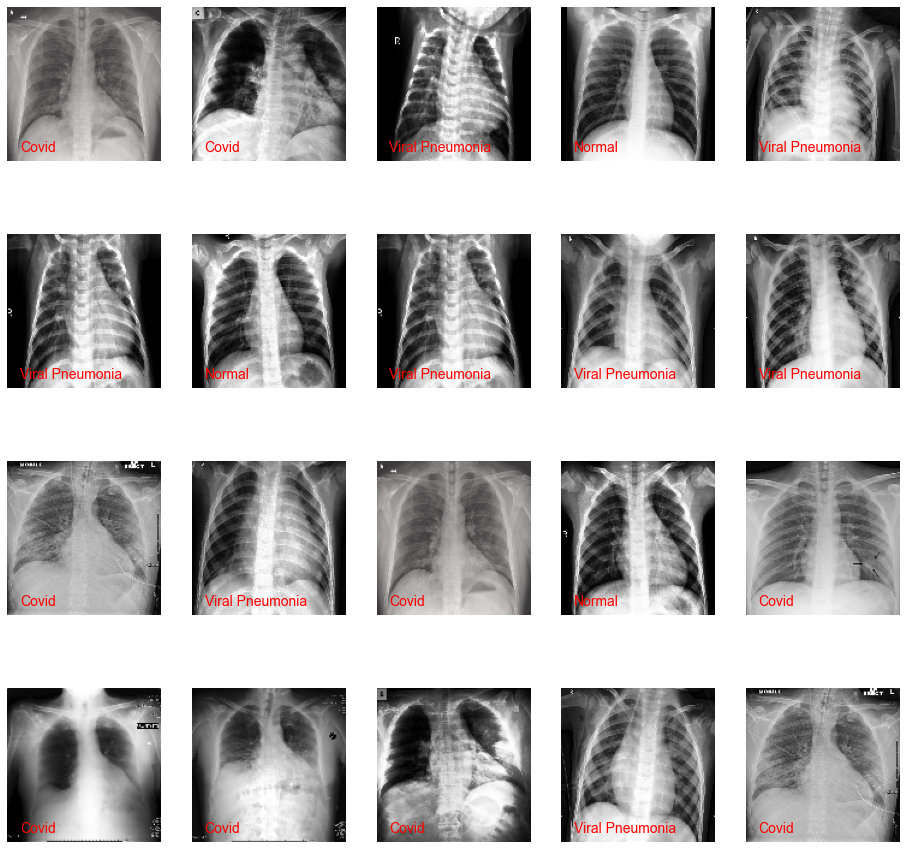

In [5]:
# visualizing 20 random samples from the test set with their labels
sample=np.random.choice(np.arange(testImages.shape[0]), size=20)
rows=4
cols=5
fig, ax=plt.subplots(rows,cols,figsize=(16,rows*4))
for i in range(rows*cols):
    ax[i//cols, i%cols].imshow(testImages[sample[i]])
    ax[i//cols, i%cols].text(x=10, y=120, s=testLabels['Label'][sample[i]], fontsize=14, c='red')
    ax[i//cols, i%cols].axis('off')
    ax[i//cols, i%cols].grid('off')

## Step 2

Value counts of each type of lable in training and test sets

In [6]:
# Exploring the data:
# shape of images
print("Training set:")
print(trainImages.shape)
print(trainLabels.shape)
print()
print("Test set")
print(testImages.shape)
print(testLabels.shape)

Training set:
(251, 128, 128, 3)
(251, 1)

Test set
(66, 128, 128, 3)
(66, 1)


* We have 251 training images each 128x128 pixels and 3 channels 
* We have 66 test images each 128X128 pixels and 3 channels 

In [7]:
print(f'The number of unique labels in the training set: {trainLabels.nunique()[0]}')
display(trainLabels.value_counts())

The number of unique labels in the training set: 3


Label          
Covid              111
Viral Pneumonia     70
Normal              70
dtype: int64

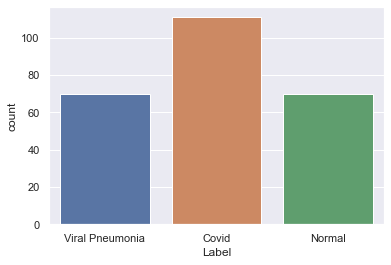

In [8]:
# value counts in training set
sns.countplot(x='Label',data=trainLabels);

In [9]:
training_dist=trainLabels.value_counts(normalize=True)
print("============Training data distribution===========")
for i in range(trainLabels.nunique()[0]):
    print(f'the percentage of "{training_dist.index[i][0]}" case is {training_dist[i]*100:0.2f}')

============Training data distribution===========
the percentage of "Covid" case is 44.22
the percentage of "Viral Pneumonia" case is 27.89
the percentage of "Normal" case is 27.89


In [10]:
print(f'The number of unique labels in the training set: {testLabels.nunique()[0]}')
testLabels.value_counts()

The number of unique labels in the training set: 3


Label          
Covid              26
Viral Pneumonia    20
Normal             20
dtype: int64

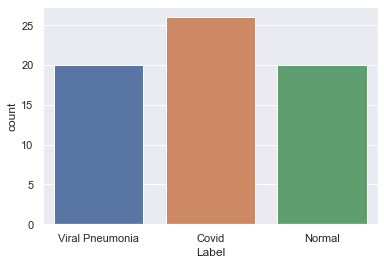

In [11]:
# value count in test set
sns.countplot(x='Label',data=testLabels);

In [12]:
test_dist=testLabels.value_counts(normalize=True)
print("============test data distribution===========")
for i in range(testLabels.nunique()[0]):
    print(f'the percentage of "{test_dist.index[i][0]}" case is {test_dist[i]*100:0.2f}')

============test data distribution===========
the percentage of "Covid" case is 39.39
the percentage of "Viral Pneumonia" case is 30.30
the percentage of "Normal" case is 30.30


## Comments:

The distribution of training and test sets are almost similar

## Step 3

The images have 3 channels since they are color images but color does not add any information and make the data unnecessarily large. Thus the first step in image preprocessing can be converting the color images to grayscale images. Since I don't have the origil images and instead I have R,G, and B channel values, I am going to use the formula that calculates the grayscale values based on R, G, and B value.

In [13]:
# converting the color image to grayscale image using the formula from skimage website:
x_train = 0.2125*trainImages[:,:,:,0] + 0.7154*trainImages[:,:,:,1] + 0.0721*trainImages[:,:,:,2]
x_test = 0.2125*testImages[:,:,:,0] + 0.7154*testImages[:,:,:,1] + 0.0721*testImages[:,:,:,2]

            original                                        grayscale


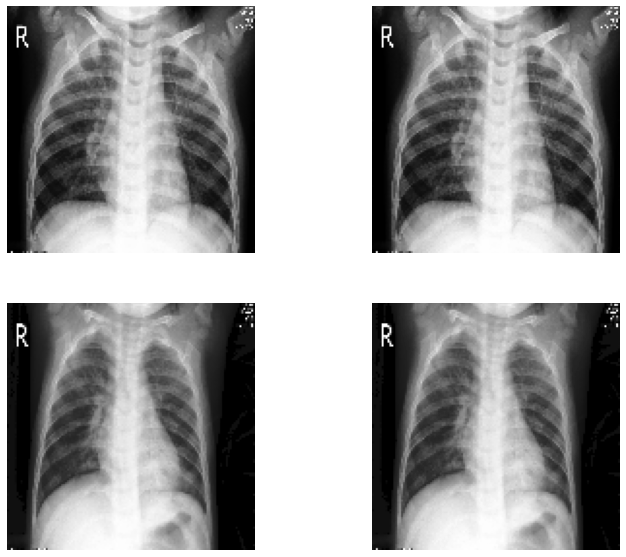

In [14]:
# checking the first two images after converting to grayscale
fig, ax=plt.subplots(2,2,figsize=(12,10))
for i in range(2):
    ax[i,0].imshow(trainImages[i])
    ax[i,0].axis('off')
    ax[i,0].grid('off')
    ax[i,1].imshow(x_train[i],cmap='gray')
    ax[i,1].axis('off')
    ax[i,1].grid('off')
    
print(' '*12+'original'+' '*40+'grayscale');

## Comments:

As it can be seen the color and grayscale images are almost identical

In [15]:
# applying Gaussian blurring on the training and test images to reduce the noise level
x_train=np.squeeze(np.apply_along_axis(lambda x:cv2.GaussianBlur(x, (5,5), 0), axis=1, arr=x_train))
x_test=np.squeeze(np.apply_along_axis(lambda x:cv2.GaussianBlur(x, (5,5), 0), axis=1, arr=x_test))

            original                                        blurred


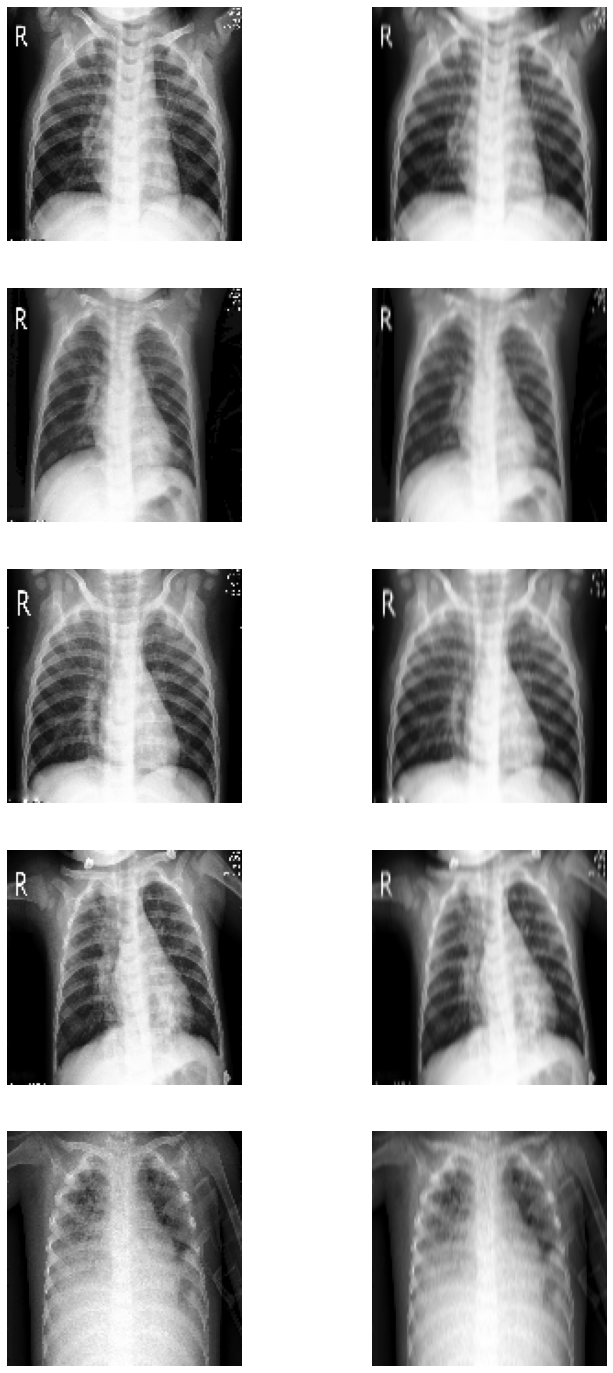

In [16]:
# checking the first five train images after Gaussian bluring
fig, ax=plt.subplots(5,2,figsize=(12,25))
for i in range(5):
    ax[i,0].imshow(trainImages[i])
    ax[i,0].axis('off')
    ax[i,0].grid('off')
    ax[i,1].imshow(x_train[i],cmap='gray')
    ax[i,1].axis('off')
    ax[i,1].grid('off')
    
print(' '*12+'original'+' '*40+'blurred');

            original                                        blurred


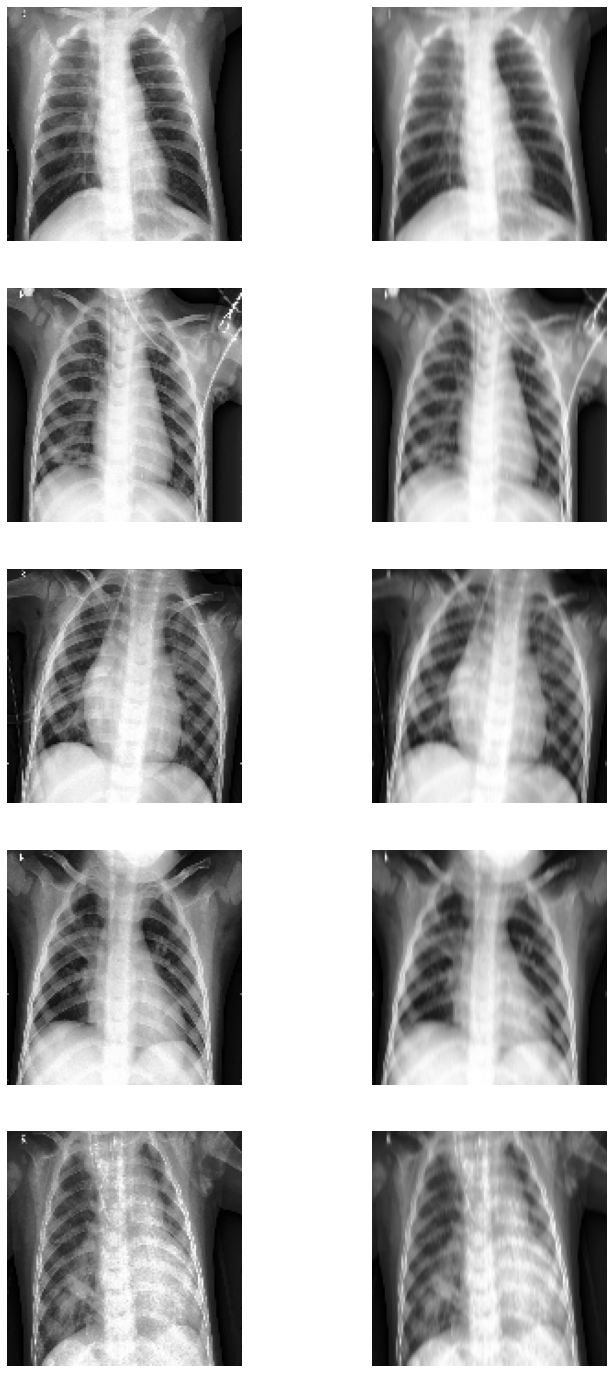

In [17]:
# checking the first five test images after Gaussian bluring
fig, ax=plt.subplots(5,2,figsize=(12,25))
for i in range(5):
    ax[i,0].imshow(testImages[i])
    ax[i,0].axis('off')
    ax[i,0].grid('off')
    ax[i,1].imshow(x_test[i],cmap='gray')
    ax[i,1].axis('off')
    ax[i,1].grid('off')
    
print(' '*12+'original'+' '*40+'blurred');

In [18]:
# normalizing the data to values between 0 and 1:
x_train=np.squeeze(np.apply_along_axis(lambda x: x.astype('float')/255.0, axis=1, arr=x_train))
x_test=np.squeeze(np.apply_along_axis(lambda x: x.astype('float')/255.0, axis=1, arr=x_test))

## Step 4

Making the data compatible for CNN

In [19]:
# reshaping the train and test data to shapes compatible with Keras models
x_train=x_train.reshape(-1,128,128,1)
x_test=x_test.reshape(-1,128,128,1)

print(x_train.shape)
print(x_test.shape)

(251, 128, 128, 1)
(66, 128, 128, 1)


In [20]:
# Converting the labels to one hot vectors
# first the string lables will be converted to unique integer numbers using sklearn labelEncoder
# then the integer lables will be converted to one hot vectors using to_categorical function from Keras
# loading libraries

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [21]:
# using label encoder to convert string labels to integer number
# 0 is Covid
# 1 is Normal
# 2 is Viral Pneumonia
label_encoder=LabelEncoder()
y_train=label_encoder.fit_transform(trainLabels)
y_test=label_encoder.transform(testLabels)
y_train=to_categorical(y_train, num_classes=3)
y_test=to_categorical(y_test, num_classes=3)

## Step 5

Building CNN

In [22]:
# Building CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

I Built a Sequential CNN model with
* one convolutional layer with 32 filters, kernel size of 3x3 and relu activation function
* one convolutional layer with 32 filters, kernel size of 5x5 and relu activation function
* one max pooling layer with pool size of 2 by 2 and strides of 2x2
* one flatten layer to convert the output to a vector for following dense layers
* one dense layer with 128 neurons and relu activation function
* one dense layer with 3 neurons and softmax activation function for multi-class classification

In [23]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Step 6

Fit and evaluate model and print confusion matrix

In [24]:
history=model.fit(x=x_train, y=y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
8/8 [==============================] - 4s 422ms/step - loss: 2.9325 - accuracy: 0.3212 - val_loss: 1.0313 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 2s 307ms/step - loss: 0.9337 - accuracy: 0.5364 - val_loss: 0.7204 - val_accuracy: 0.6818
Epoch 3/50
8/8 [==============================] - 2s 305ms/step - loss: 0.4591 - accuracy: 0.8109 - val_loss: 0.4631 - val_accuracy: 0.8030
Epoch 4/50
8/8 [==============================] - 2s 308ms/step - loss: 0.2415 - accuracy: 0.9172 - val_loss: 0.3313 - val_accuracy: 0.8333
Epoch 5/50
8/8 [==============================] - 2s 308ms/step - loss: 0.1754 - accuracy: 0.9357 - val_loss: 0.4368 - val_accuracy: 0.8333
Epoch 6/50
8/8 [==============================] - 3s 316ms/step - loss: 0.1088 - accuracy: 0.9627 - val_loss: 0.3178 - val_accuracy: 0.8030
Epoch 7/50
8/8 [==============================] - 2s 303ms/step - loss: 0.0697 - accuracy: 0.9757 - val_loss: 0.2581 - val_accuracy: 0.8788
Epoch 8/50
8/8 [====

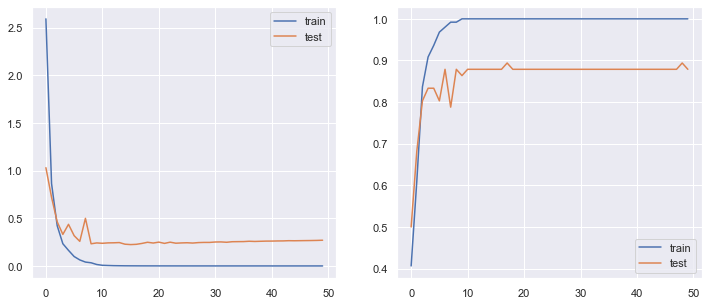

In [25]:
hist=history.history
fig, ax= plt.subplots(1,2,figsize=(12,5))
ax[0].plot(hist['loss'], label='train')
ax[0].plot(hist['val_loss'], label='test')
ax[0].legend()
ax[1].plot(hist['accuracy'], label='train')
ax[1].plot(hist['val_accuracy'], label='test')
ax[1].legend();

In [26]:
loss,acc=model.evaluate(x_test, y_test, verbose=False)
print(f"The accuracy of the classifier on the test data is {acc*100:.2f}%")

The accuracy of the classifier on the test data is 87.88%


In [27]:
predictLabels=np.argmax(model.predict(x_test),axis=1)

In [28]:
predictLabels=pd.DataFrame({'Label':predictLabels}).replace({
    0 : 'Covid',
    1 : 'Normal',
    2 : 'Viral Pneumonia'
})

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

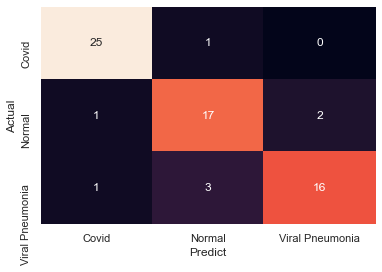

In [30]:
cm=confusion_matrix(testLabels, predictLabels)
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=['Covid', 'Normal', 'Viral Pneumonia'],
            yticklabels=['Covid', 'Normal', 'Viral Pneumonia']
            )
plt.xlabel('Predict')
plt.ylabel('Actual');

In [31]:
cr=classification_report(testLabels, predictLabels)
print(cr)

                 precision    recall  f1-score   support

          Covid       0.93      0.96      0.94        26
         Normal       0.81      0.85      0.83        20
Viral Pneumonia       0.89      0.80      0.84        20

       accuracy                           0.88        66
      macro avg       0.87      0.87      0.87        66
   weighted avg       0.88      0.88      0.88        66



## Step 7

Visualizing the predition for selected test cases

            Actual                                    Prediction


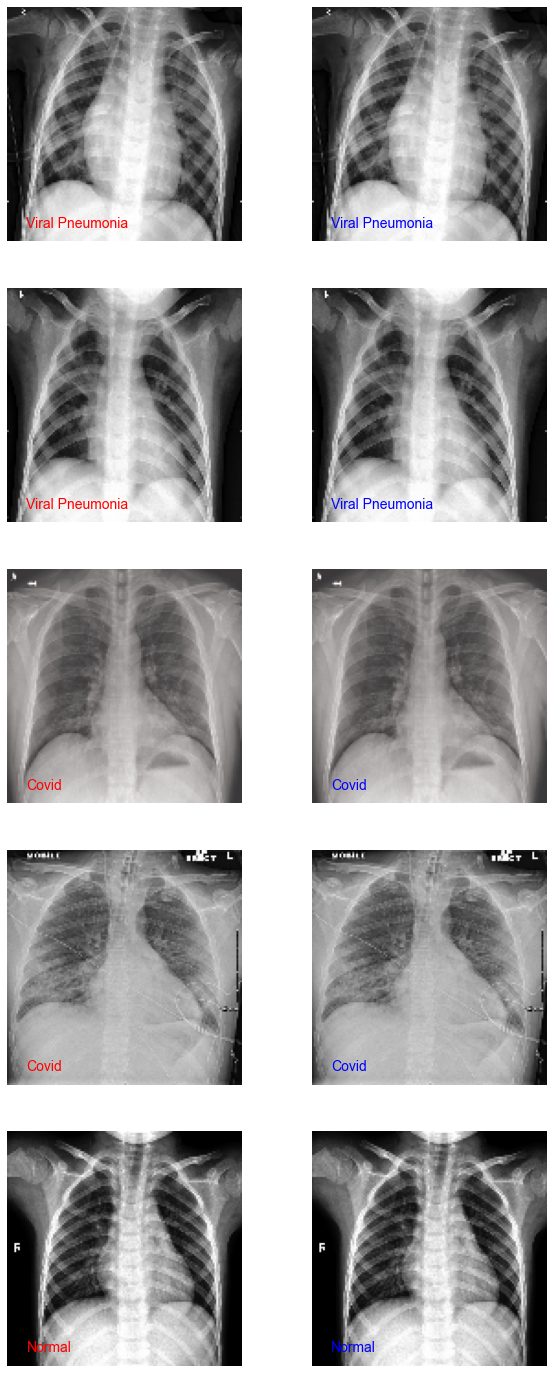

In [32]:
sample=[2,3,33,36,59]
fig, ax=plt.subplots(5,2, figsize=(10,25))
for i,s in enumerate(sample):
    ax[i, 0].imshow(testImages[s])
    ax[i, 0].text(x=10, y=120, s=testLabels['Label'][sample[i]], fontsize=14, c='red')
    ax[i,0].axis('off')
    ax[i,0].grid('off')
    ax[i, 1].imshow(testImages[s])
    ax[i, 1].text(x=10, y=120, s=predictLabels['Label'][sample[i]], fontsize=14, c='blue')
    ax[i,1].axis('off')
    ax[i,1].grid('off')
    
print(' '*12+'Actual'+' '*36+'Prediction');

<b>Comment</b> In all five cases the CNN was able to classify x-ray images correctly